In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', None)
# Right after importing seaborn (could also use 'whitegrid')
sns.set_theme(style='darkgrid', context='talk')

import warnings
warnings.filterwarnings('ignore')

In [2]:
orders=pd.read_csv('orders.csv', sep=';', low_memory=False)
orders.head()

,order_id,date,payment,item_code,quantity,unit_price_vat_excl,unit_cogs,unit_rrp_vat_excl,department,channel,owner,site,CreatedAt
0,1900052301,2019-06-04 00:00:00,Dobírka,ZB00025746,1,9.412096,0.000000,0.0,E-COMMER,FTB.roC,FTB.roO,11teamsports.ro,2019-06-04 09:22:00
1,1900052301,2019-06-04 00:00:00,Dobírka,ZB00022010,1,12.784729,4.087597,0.0,E-COMMER,FTB.roC,FTB.roO,11teamsports.ro,2019-06-04 09:22:00
2,1900052301,2019-06-04 00:00:00,Dobírka,ZB00004531,1,8.524561,0.231008,0.0,E-COMMER,FTB.roC,FTB.roO,11teamsports.ro,2019-06-04 09:22:00
3,1900052301,2019-06-04 00:00:00,Dobírka,ZB00011355,1,6.747378,2.158140,0.0,E-COMMER,FTB.roC,FTB.roO,11teamsports.ro,2019-06-04 09:22:00
4,1900073403,2019-06-04 00:00:00,Dobírka,ZB00025748,1,88.378682,0.000000,0.0,E-COMMER,FTB.czC,VO_B_FTO,11teamsports.cz,2019-06-04 09:22:00


In [3]:
orders.shape

(1420929, 13)

In [4]:
items_df=pd.read_csv('items.csv', sep=';')
items_df.head()

,item_code,item_name,style,brand_id,name,teamsales,group0_id,group0,group1_id,group1,group2_id,group2,group3_id,group3,group4_id,group4,category,CodeBars
0,S101,Dopravné,NaN,-1,- žádný výrobce -,N,999.0,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S101
1,S102,Potisk,NaN,-1,- žádný výrobce -,N,999.0,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S102
2,S103,Marketingová podpora,NaN,-1,- žádný výrobce -,N,999.0,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S103
3,S104,Vltava Run,NaN,-1,- žádný výrobce -,N,999.0,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S104
4,S105,Služby - vnitro,NaN,-1,- žádný výrobce -,N,999.0,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S105


In [5]:
items_df.shape

(228152, 18)

In [6]:
items_df.isnull().sum()

item_code         0
item_name      2037
style          8331
brand_id          0
name              0
teamsales         0
group0_id        18
group0         2419
group1_id      8870
group1        26700
group2_id      8870
group2       173437
group3_id      8870
group3       228152
group4_id      8870
group4       228152
category      24895
CodeBars         34
dtype: int64

In [7]:
orders.isnull().sum()

order_id                1829
date                       0
payment                 3225
item_code                  0
quantity                   0
unit_price_vat_excl        0
unit_cogs                  0
unit_rrp_vat_excl      11467
department                 0
channel                    0
owner                      0
site                       0
CreatedAt                  0
dtype: int64

In [8]:
orders['site'].value_counts()

11teamsports.cz     282889
11teamsports.sk     143533
top4running.cz      137627
11teamsports.hu     128277
11teamsports.ro     127018
top4running.sk       59050
top4running.de       54682
top4running.hu       51582
Other                41810
top4running.es       37706
top4fitness.cz       36785
top4fitness.sk       35220
top4sport.cz         30990
top4running.ro       26412
top4running.fr       22790
top4football.es      22679
top4fitness.hu       20173
top4fitness.ro       17525
top4running.com      15086
top4football.fr      14070
top4football.de      12788
11teamsports.hr      12093
top4fitness.de       11134
top4fitness.es       11130
top4running.it       10832
top4street.cz        10541
top4football.com      9172
top4football.it       5704
top4running.at        5606
top4street.hu         5083
top4street.sk         3851
top4fitness.fr        3780
top4running.hr        3515
top4fitness.com       3000
top4street.ro         2710
top4fitness.it        2373
top4fitness.hr         971
t

In [9]:
orders.head()

,order_id,date,payment,item_code,quantity,unit_price_vat_excl,unit_cogs,unit_rrp_vat_excl,department,channel,owner,site,CreatedAt
0,1900052301,2019-06-04 00:00:00,Dobírka,ZB00025746,1,9.412096,0.000000,0.0,E-COMMER,FTB.roC,FTB.roO,11teamsports.ro,2019-06-04 09:22:00
1,1900052301,2019-06-04 00:00:00,Dobírka,ZB00022010,1,12.784729,4.087597,0.0,E-COMMER,FTB.roC,FTB.roO,11teamsports.ro,2019-06-04 09:22:00
2,1900052301,2019-06-04 00:00:00,Dobírka,ZB00004531,1,8.524561,0.231008,0.0,E-COMMER,FTB.roC,FTB.roO,11teamsports.ro,2019-06-04 09:22:00
3,1900052301,2019-06-04 00:00:00,Dobírka,ZB00011355,1,6.747378,2.158140,0.0,E-COMMER,FTB.roC,FTB.roO,11teamsports.ro,2019-06-04 09:22:00
4,1900073403,2019-06-04 00:00:00,Dobírka,ZB00025748,1,88.378682,0.000000,0.0,E-COMMER,FTB.czC,VO_B_FTO,11teamsports.cz,2019-06-04 09:22:00


In [10]:
# Preparing the datasets for EDA and time series analysis and combining them into one dataset
def process(orders, items_df):
    orders['date']=pd.to_datetime(orders['date'])#converting it to standard datetime format
    orders['order_id']=orders['order_id'].astype(str) #converting it str in order to be readable
    orders['net_revenue'] = orders['quantity'] * orders['unit_price_vat_excl']
    orders['gross_revenue'] = orders['quantity'] * orders['unit_cogs']
    orders['margin_revenue'] = orders['quantity'] * (orders['unit_price_vat_excl'] - orders['unit_cogs'])
    orders.drop(orders[orders['site']=='Other'].index, inplace=True) #dropping rows that have Other and i am not sure which country do they belong to
    orders['country']=orders['site'].apply(lambda x: x.split('.')[1]) #Extracting the domains names to find out which coutry the website belongs to and creating a new colum for country names
    orders.drop(orders[orders['country']=='com'].index, inplace=True)# #dropping rows that have .com in the country column because i am not sure which country do they belong to. Besides, there is small number of rows with this domain name.
    orders['country']=orders['country'].replace({'hr': 'Croatia', 'cz':'Czech Republic', 'it': 'Italy', 'ro':'Romania', 'sk':'Slovakia', 'fr':'France', 'de':'Germany', 'es':'Spain', 'hu':'Hungary', 'at':'Austria'}) # Renaming the values taken from domain with the country names
    orders=orders.drop(['payment','unit_rrp_vat_excl', 'department', 'channel', 'owner', 'site', 'CreatedAt'], axis=1)# dropping the columns as I was instructed by the head of corriculum
    
    # Cleaning items_df dataset
    items=items_df[['item_code', 'item_name', 'style', 'name', 'group0', 'group1', 'category']] # taking only necessary variables. Groups 3 and 4 have a lot missing values and can't be used in this project.
    
    final_df=pd.merge(orders, items, on='item_code',)
    return final_df
    
   

In [11]:
data=process(orders, items_df)

In [12]:
data.head()

,order_id,date,item_code,quantity,unit_price_vat_excl,unit_cogs,net_revenue,gross_revenue,margin_revenue,country,item_name,style,name,group0,group1,category
0,1900052301,2019-06-04,ZB00025746,1,9.412096,0.000000,9.412096,0.000000,9.412096,Romania,YTH LEAGUE KNIT SHORT NB,725990-010,Nike,Apparel,Pants,football
1,1900100835,2019-07-15,ZB00025746,1,8.648837,5.393411,8.648837,5.393411,3.255426,Czech Republic,YTH LEAGUE KNIT SHORT NB,725990-010,Nike,Apparel,Pants,football
2,1900106577,2019-07-24,ZB00025746,1,8.648837,5.458527,8.648837,5.458527,3.190310,Czech Republic,YTH LEAGUE KNIT SHORT NB,725990-010,Nike,Apparel,Pants,football
3,1900111398,2019-08-01,ZB00025746,1,8.648837,5.440310,8.648837,5.440310,3.208527,Czech Republic,YTH LEAGUE KNIT SHORT NB,725990-010,Nike,Apparel,Pants,football
4,1900052301,2019-06-04,ZB00022010,1,12.784729,4.087597,12.784729,4.087597,8.697132,Romania,NK MERC LT GRD,sp2120-703,Nike,Equipment,Guards,football


In [13]:
data.shape

(1351861, 16)

In [14]:
data.isnull().sum()

order_id                    0
date                        0
item_code                   0
quantity                    0
unit_price_vat_excl         0
unit_cogs                   0
net_revenue                 0
gross_revenue               0
margin_revenue              0
country                     0
item_name                 265
style                  498526
name                        0
group0                    775
group1                 513825
category               502909
dtype: int64

In [15]:
data['item_name'].value_counts()

Dopravné                                      270119
Platba                                        216558
Sleva                                          11419
NIKE AIR ZOOM PEGASUS 37                        5609
M NP SHORT                                      5066
                                               ...  
BOS LOGO TANK                                      1
UA Vanish Polo                                     1
Nike FC Barcelona Vaporknit Drill Top F456         1
CR7 Y NK DRY SQD TOP SS GX                         1
NIKE 1000 SOFTSET OUTDOOR VOLLEYBALL 18P           1
Name: item_name, Length: 20826, dtype: int64

In [16]:
data['group0'].value_counts()

Other        498476
Apparel      429844
Footwear     325211
Equipment     95732
Nutrition      1679
Services        144
Name: group0, dtype: int64

In [17]:
data['item_name'].replace(np.nan, 'Dopravné', inplace=True)
data['group0'].replace(np.nan, 'Other', inplace=True)

In [18]:
data.isnull().sum()

order_id                    0
date                        0
item_code                   0
quantity                    0
unit_price_vat_excl         0
unit_cogs                   0
net_revenue                 0
gross_revenue               0
margin_revenue              0
country                     0
item_name                   0
style                  498526
name                        0
group0                      0
group1                 513825
category               502909
dtype: int64

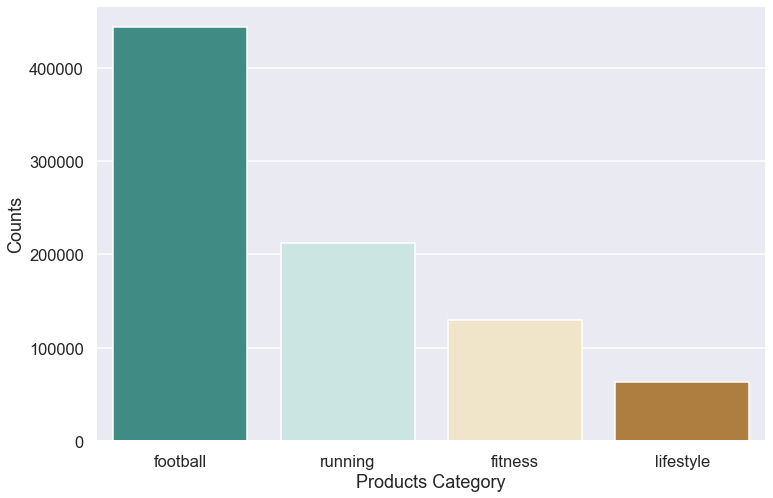

In [19]:
products_category=data['category'].value_counts()
plt.figure(figsize=(12, 8))
sns.barplot(products_category.index, products_category.values, palette='BrBG_r')
plt.ylabel('Counts')
plt.xlabel('Products Category')
plt.show()

In [20]:
# let's see how many manufactures the top4sport sales their products 
manufacturers=data.name.nunique()
print(f'There are {manufacturers} manufacturers that top4sport sales their products in the market.')

There are 93 manufacturers that top4sport sales their products in the market.


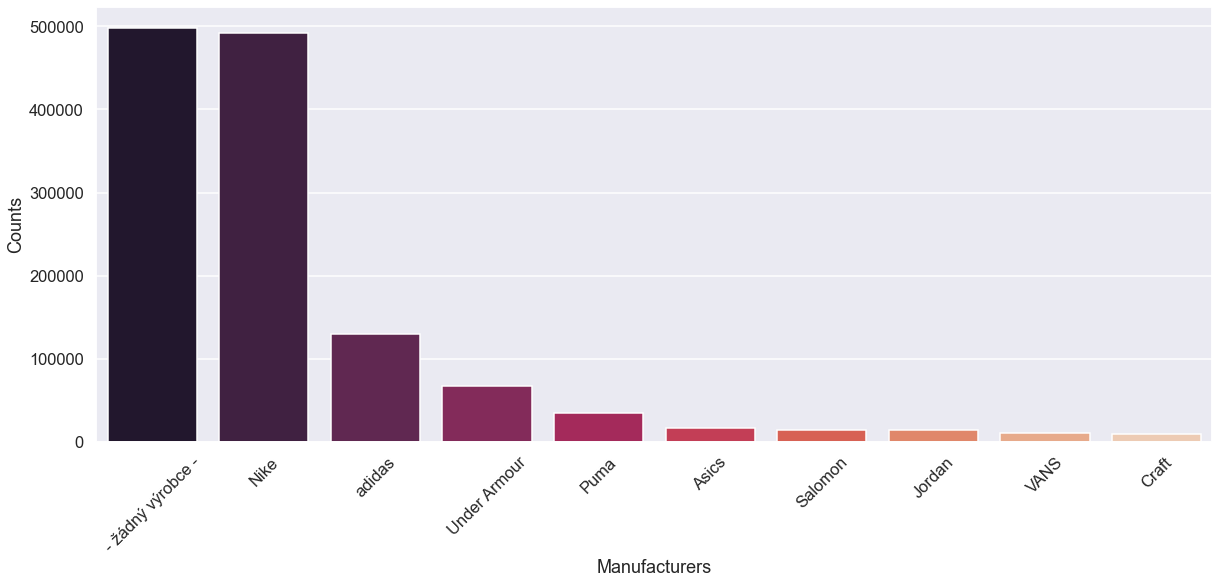

In [21]:
# Let's see the number of orders based on products manufacturers
product_manufacturers=data['name'].value_counts().head(10)
plt.figure(figsize=(20, 8))
sns.barplot(product_manufacturers.index, product_manufacturers.values, palette='rocket')
plt.ylabel('Counts')
plt.xlabel('Manufacturers')
plt.xticks(rotation=45)
plt.show()

In [22]:
data['group0'].value_counts()

Other        499251
Apparel      429844
Footwear     325211
Equipment     95732
Nutrition      1679
Services        144
Name: group0, dtype: int64

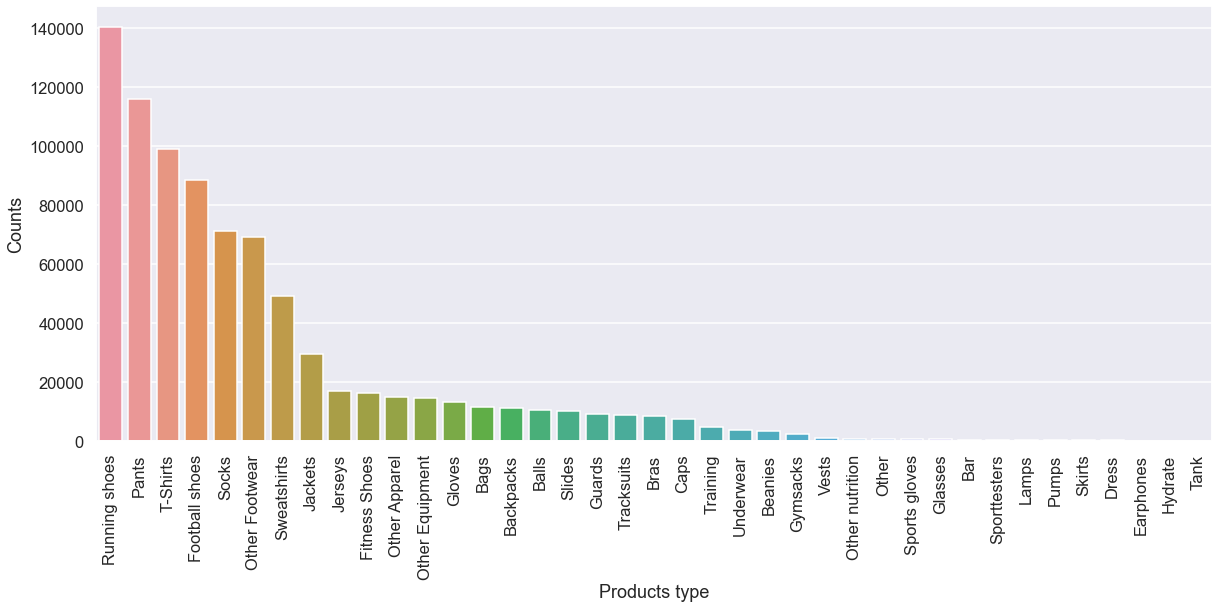

In [23]:
# Let's see which products are usually purchased by customers from top4sport
products=data['group1'].value_counts()
plt.figure(figsize=(20, 8))
sns.barplot(products.index, products.values)
plt.ylabel('Counts')
plt.xlabel('Products type')
plt.xticks(rotation=90)
plt.show()

In [24]:
# How many unique products the company has?
data.item_code.nunique()

161318

In [25]:
country=data['country'].value_counts()
print(country)

Czech Republic    498832
Slovakia          241654
Hungary           205115
Romania           173665
Germany            78604
Spain              71515
France             40640
Italy              18909
Croatia            16579
Austria             6348
Name: country, dtype: int64


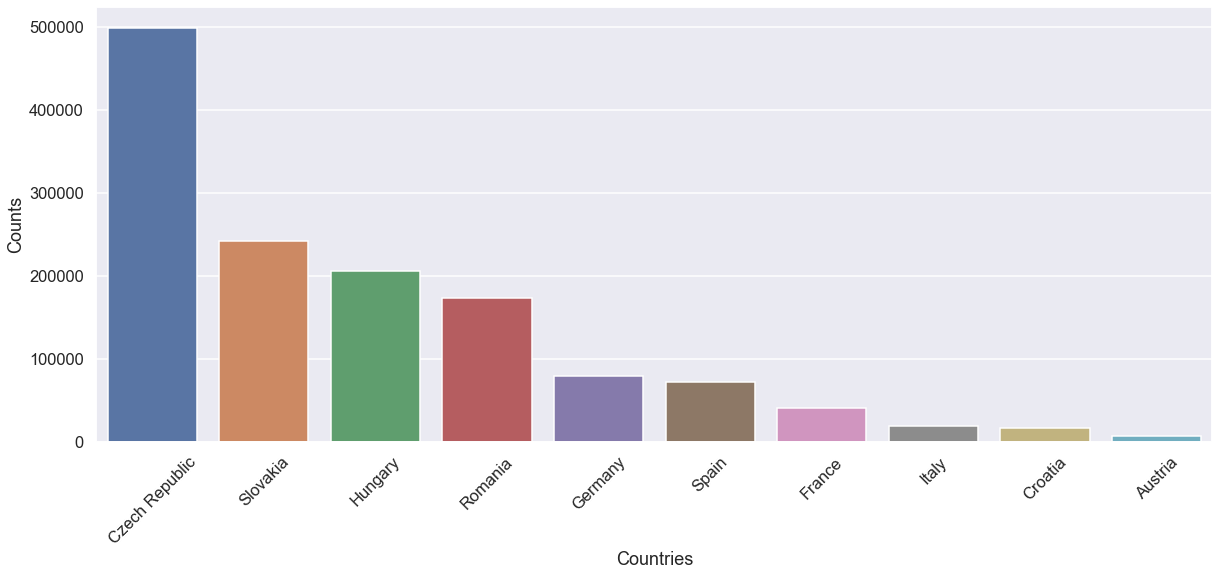

In [26]:
# Let's see the number of orders in different countries
country=data['country'].value_counts()
plt.figure(figsize=(20, 8))
sns.barplot(country.index, country.values)
plt.ylabel('Counts')
plt.xlabel('Countries')
plt.xticks(rotation=45)
plt.show()

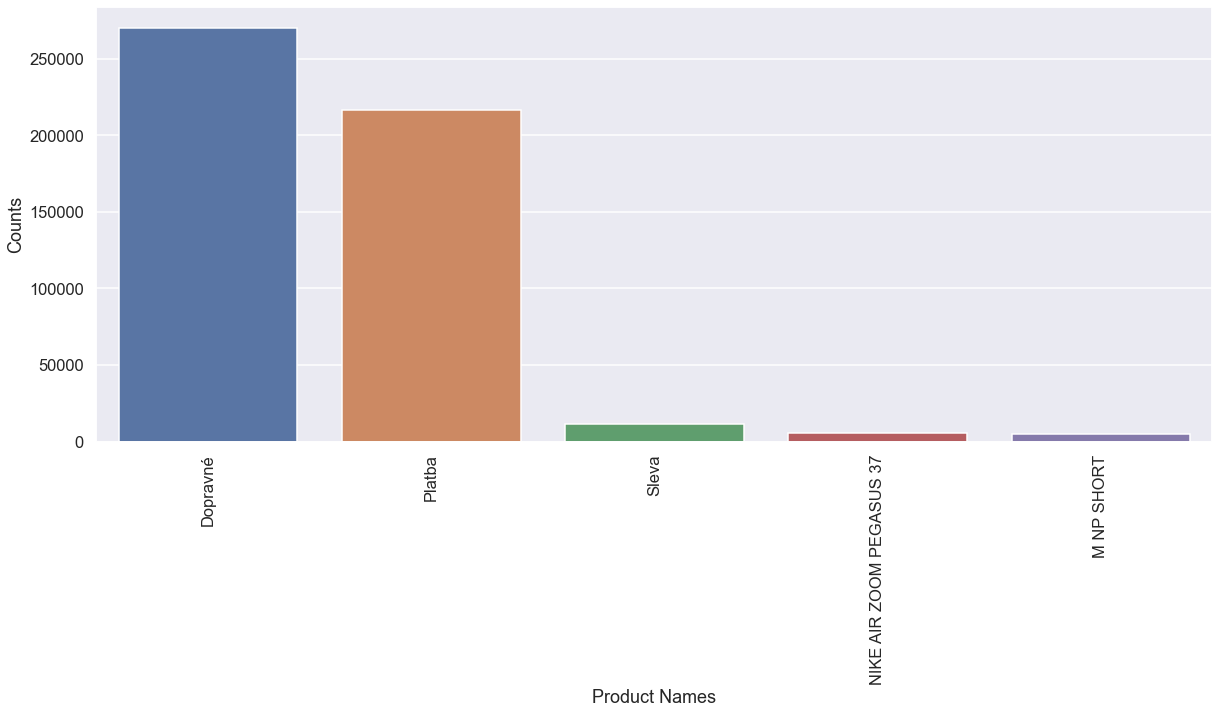

In [75]:
items_sales=data['item_name'].value_counts().head(5)
plt.figure(figsize=(20, 8))
sns.barplot(items_sales.index, items_sales.values)
plt.ylabel('Counts')
plt.xlabel('Product Names')
plt.xticks(rotation=90)
plt.show()


In [28]:
items_sales=data['item_name'].value_counts().head(5)
items_sales

Dopravné                    270384
Platba                      216558
Sleva                        11419
NIKE AIR ZOOM PEGASUS 37      5609
M NP SHORT                    5066
Name: item_name, dtype: int64

In [29]:
data['item_code'].value_counts()

S101          270119
S113          216558
S114           11419
ZB00077277      1259
ZB00088644      1137
               ...  
ZB00164119         1
ZB00096175         1
ZB00144044         1
ZB00090691         1
ZB00105634         1
Name: item_code, Length: 161318, dtype: int64

In [30]:
df=data[['item_code', 'quantity', 'item_name']].value_counts()

In [32]:
df.head()

item_code   quantity  item_name              
S101         1        Dopravné                   270119
S113         1        Platba                     216556
S114        -1        Sleva                       11417
ZB00088644   1        M NK DRY PARK20 PANT KP      1102
ZB00077277   1        Nike Everyday 3 pack         1077
dtype: int64

In [31]:
data.head()

,order_id,date,item_code,quantity,unit_price_vat_excl,unit_cogs,net_revenue,gross_revenue,margin_revenue,country,item_name,style,name,group0,group1,category
0,1900052301,2019-06-04,ZB00025746,1,9.412096,0.000000,9.412096,0.000000,9.412096,Romania,YTH LEAGUE KNIT SHORT NB,725990-010,Nike,Apparel,Pants,football
1,1900100835,2019-07-15,ZB00025746,1,8.648837,5.393411,8.648837,5.393411,3.255426,Czech Republic,YTH LEAGUE KNIT SHORT NB,725990-010,Nike,Apparel,Pants,football
2,1900106577,2019-07-24,ZB00025746,1,8.648837,5.458527,8.648837,5.458527,3.190310,Czech Republic,YTH LEAGUE KNIT SHORT NB,725990-010,Nike,Apparel,Pants,football
3,1900111398,2019-08-01,ZB00025746,1,8.648837,5.440310,8.648837,5.440310,3.208527,Czech Republic,YTH LEAGUE KNIT SHORT NB,725990-010,Nike,Apparel,Pants,football
4,1900052301,2019-06-04,ZB00022010,1,12.784729,4.087597,12.784729,4.087597,8.697132,Romania,NK MERC LT GRD,sp2120-703,Nike,Equipment,Guards,football


In [50]:
data.isnull().sum()


order_id                    0
date                        0
item_code                   0
quantity                    0
unit_price_vat_excl         0
unit_cogs                   0
net_revenue                 0
gross_revenue               0
margin_revenue              0
country                     0
item_name                   0
style                  498526
name                        0
group0                      0
group1                 513825
category               502909
dtype: int64

In [44]:
data.to_csv(r'data_half_cleaned.csv')

In [45]:
data_df=pd.read_csv('data_half_cleaned.csv')
data_df.head()

,Unnamed: 0,order_id,date,item_code,quantity,unit_price_vat_excl,unit_cogs,net_revenue,gross_revenue,margin_revenue,country,item_name,style,name,group0,group1,category
0,0,1.900052e+09,2019-06-04,ZB00025746,1,9.412096,0.000000,9.412096,0.000000,9.412096,Romania,YTH LEAGUE KNIT SHORT NB,725990-010,Nike,Apparel,Pants,football
1,1,1.900101e+09,2019-07-15,ZB00025746,1,8.648837,5.393411,8.648837,5.393411,3.255426,Czech Republic,YTH LEAGUE KNIT SHORT NB,725990-010,Nike,Apparel,Pants,football
2,2,1.900107e+09,2019-07-24,ZB00025746,1,8.648837,5.458527,8.648837,5.458527,3.190310,Czech Republic,YTH LEAGUE KNIT SHORT NB,725990-010,Nike,Apparel,Pants,football
3,3,1.900111e+09,2019-08-01,ZB00025746,1,8.648837,5.440310,8.648837,5.440310,3.208527,Czech Republic,YTH LEAGUE KNIT SHORT NB,725990-010,Nike,Apparel,Pants,football
4,4,1.900052e+09,2019-06-04,ZB00022010,1,12.784729,4.087597,12.784729,4.087597,8.697132,Romania,NK MERC LT GRD,sp2120-703,Nike,Equipment,Guards,football


In [46]:
data_df.isnull().sum()

Unnamed: 0                  0
order_id                  132
date                        0
item_code                   0
quantity                    0
unit_price_vat_excl         0
unit_cogs                   0
net_revenue                 0
gross_revenue               0
margin_revenue              0
country                     0
item_name                   0
style                  498526
name                        0
group0                      0
group1                 513825
category               502909
dtype: int64

In [53]:
data_df=data_df.dropna()

In [55]:
data_df.isnull().sum()

Unnamed: 0             0
order_id               0
date                   0
item_code              0
quantity               0
unit_price_vat_excl    0
unit_cogs              0
net_revenue            0
gross_revenue          0
margin_revenue         0
country                0
item_name              0
style                  0
name                   0
group0                 0
group1                 0
category               0
dtype: int64

In [57]:
data_df.sort_values('date')

,Unnamed: 0,order_id,date,item_code,quantity,unit_price_vat_excl,unit_cogs,net_revenue,gross_revenue,margin_revenue,country,item_name,style,name,group0,group1,category
572258,572258,1.900079e+09,2019-06-01,ZB00026724,1,64.342158,36.101938,64.342158,36.101938,28.240220,Romania,Adidas Predator Pro Hybrid,dy2617,adidas,Equipment,Gloves,football
628585,628585,1.900079e+09,2019-06-01,ZB00026705,1,21.942636,11.203488,21.942636,11.203488,10.739147,Czech Republic,reflective wordmark legging,10004552-a01,Converse,Apparel,Pants,lifestyle
628584,628584,1.900079e+09,2019-06-01,ZB00025611,1,48.295418,32.417829,48.295418,32.417829,15.877588,Hungary,CLASSIC CORTEZ NYLON,807472-101,Nike,Footwear,Other Footwear,football
513974,513974,1.900078e+09,2019-06-01,ZB00000374,1,11.677689,8.123256,11.677689,8.123256,3.554434,Slovakia,NK HERITAGE HIP PACK,ba5750-368,Nike,Equipment,Bags,football
628575,628575,1.900079e+09,2019-06-01,ZB00024304,1,73.643411,36.472481,73.643411,36.472481,37.170930,Czech Republic,SUPERFLY 6 ACADEMY MG,ah7362-408,Nike,Footwear,Football shoes,football
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1006959,1006959,2.100190e+09,2021-05-07,ZB00132418,1,14.014272,8.294574,14.014272,8.294574,5.719698,Hungary,M NK TROPHY IV JSY SS,bv6725-354,Nike,Apparel,Jerseys,football
737824,737824,2.100190e+09,2021-05-07,ZB00063251,1,15.378100,7.713178,15.378100,7.713178,7.664922,Romania,LIGA Training Shorts Core,65566403,Puma,Apparel,Pants,football
1301695,1301695,2.100190e+09,2021-05-07,ZB00201194,1,105.676356,76.455426,105.676356,76.455426,29.220930,Czech Republic,M CLIFTON 7,1110508-fwt,Hoka One One,Footwear,Running shoes,running
1244538,1244538,2.100190e+09,2021-05-07,ZB00176492,1,12.962570,8.961240,12.962570,8.961240,4.001329,Germany,CRAFT Mid 3-Pack Socks,1906060-561007,Craft,Apparel,Socks,running


In [58]:
data_df.tail()

,Unnamed: 0,order_id,date,item_code,quantity,unit_price_vat_excl,unit_cogs,net_revenue,gross_revenue,margin_revenue,country,item_name,style,name,group0,group1,category
1351854,1351854,2.100190e+09,2021-05-07,ZB00216050,1,13.944279,10.077519,13.944279,10.077519,3.866760,Slovakia,CRAFT Prime SS Tee,199205-1999,Craft,Apparel,T-Shirts,fitness
1351855,1351855,2.100190e+09,2021-05-07,ZB00207510,1,95.085558,53.146512,95.085558,53.146512,41.939046,Slovakia,NIKE AIR ZOOM PEGASUS 38,cw7356-002,Nike,Footwear,Running shoes,running
1351856,1351856,2.100190e+09,2021-05-07,ZB00209761,1,22.709541,15.087209,22.709541,15.087209,7.622331,France,M NP DF HPR DRY TOP SS,cz1181-073,Nike,Apparel,T-Shirts,fitness
1351857,1351857,2.100190e+09,2021-05-07,ZB00209766,1,22.709541,15.087209,22.709541,15.087209,7.622331,France,M NP DF HPR DRY TOP SS,cz1181-451,Nike,Apparel,T-Shirts,fitness
1351858,1351858,2.100190e+09,2021-05-07,ZB00194561,1,34.022095,20.310078,34.022095,20.310078,13.712018,Hungary,M NK STRIKE 21 DRY FZ JKT,cw5865-657,Nike,Apparel,Jackets,football


In [69]:
data[data['item_name']=='Dopravné']

,order_id,date,item_code,quantity,unit_price_vat_excl,unit_cogs,net_revenue,gross_revenue,margin_revenue,country,item_name,style,name,group0,group1,category
216754,1900073412,2019-06-04,S101,1,1.924015,0.000000,1.924015,0.000000,1.924015,Hungary,Dopravné,NaN,- žádný výrobce -,Other,NaN,NaN
216755,1900076551,2019-06-04,S101,1,1.569767,0.000000,1.569767,0.000000,1.569767,Czech Republic,Dopravné,NaN,- žádný výrobce -,Other,NaN,NaN
216756,1900076878,2019-06-04,S101,1,4.965767,0.000000,4.965767,0.000000,4.965767,Spain,Dopravné,NaN,- žádný výrobce -,Other,NaN,NaN
216757,1900077123,2019-06-04,S101,1,2.210078,0.000000,2.210078,0.000000,2.210078,Czech Republic,Dopravné,NaN,- žádný výrobce -,Other,NaN,NaN
216758,1900077199,2019-06-04,S101,1,1.569767,0.000000,1.569767,0.000000,1.569767,Czech Republic,Dopravné,NaN,- žádný výrobce -,Other,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1351583,2100188604,2021-05-06,ZB00215518,1,12.556977,5.826744,12.556977,5.826744,6.730233,Czech Republic,Dopravné,NaN,- žádný výrobce -,Other,NaN,NaN
1351638,2100188934,2021-05-06,ZB00222947,1,102.472868,55.455039,102.472868,55.455039,47.017829,Czech Republic,Dopravné,NaN,- žádný výrobce -,Other,NaN,NaN
1351789,2100189876,2021-05-07,ZB00227493,1,58.772331,41.782946,58.772331,41.782946,16.989386,Slovakia,Dopravné,NaN,- žádný výrobce -,Other,NaN,NaN
1351790,2100189892,2021-05-07,ZB00227494,1,92.268600,63.333333,92.268600,63.333333,28.935267,Romania,Dopravné,NaN,- žádný výrobce -,Other,NaN,NaN


In [76]:
data[data['country']=='Czech Republic']

,order_id,date,item_code,quantity,unit_price_vat_excl,unit_cogs,net_revenue,gross_revenue,margin_revenue,country,item_name,style,name,group0,group1,category
1,1900100835,2019-07-15,ZB00025746,1,8.648837,5.393411,8.648837,5.393411,3.255426,Czech Republic,YTH LEAGUE KNIT SHORT NB,725990-010,Nike,Apparel,Pants,football
2,1900106577,2019-07-24,ZB00025746,1,8.648837,5.458527,8.648837,5.458527,3.190310,Czech Republic,YTH LEAGUE KNIT SHORT NB,725990-010,Nike,Apparel,Pants,football
3,1900111398,2019-08-01,ZB00025746,1,8.648837,5.440310,8.648837,5.440310,3.208527,Czech Republic,YTH LEAGUE KNIT SHORT NB,725990-010,Nike,Apparel,Pants,football
5,1900081574,2019-06-05,ZB00022010,1,17.297674,4.087597,17.297674,4.087597,13.210078,Czech Republic,NK MERC LT GRD,sp2120-703,Nike,Equipment,Guards,football
9,1900110135,2019-07-30,ZB00004531,1,12.268605,6.804651,12.268605,6.804651,5.463953,Czech Republic,U NK DRY CUSH CREW 3PR,sx5547-010,Nike,Apparel,Socks,football
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1351820,2100190040,2021-05-07,ZB00227528,1,100.839147,78.372093,100.839147,78.372093,22.467054,Czech Republic,FUTURE Z 1.1 FG/AG,10602802,Puma,Other,NaN,NaN
1351825,2100190058,2021-05-07,ZB00227532,1,44.717829,23.255814,44.717829,23.255814,21.462015,Czech Republic,Under Armour HG Amr Tonal,1365348-001,Under Armour,Other,NaN,NaN
1351826,2100190058,2021-05-07,ZB00220179,1,78.832558,39.205039,78.832558,39.205039,39.627519,Czech Republic,AERO JACKET Women,wr6538a-blksrf,2XU,Apparel,Jackets,running
1351829,2100190078,2021-05-07,ZB00159268,1,23.992636,19.700000,23.992636,19.700000,4.292636,Czech Republic,HEAT.RDY SHORTW,gk3771,adidas,Apparel,Pants,running


In [79]:
data_df.to_csv('sales_data.csv')